## Notebook to analyse metadata 
- To get statestic about the PC-GITA dataset 

In [1]:
%run project_setup.py 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from constants import personal_path_to_PC_GITA, PD_color, HC_color, personal_path_to_balanced_folds, personal_path_to_code
from functions import plot_histogram, add_columns_to_dataframe, write_to_excel, restructure_id, autolabel

In [2]:
metadata_path = os.path.join(personal_path_to_PC_GITA,'PCGITA_metadata.xlsx')
metadata = pd.read_excel(metadata_path)

metadata = restructure_id(metadata)

display(metadata)

,ID,UPDRS,UPDRS-speech,H/Y,SEX,AGE,time after diagnosis
0,A0001,28.0,1.0,2.0,M,64,3.0
1,A0002,19.0,0.0,1.0,F,72,2.5
2,A0003,52.0,2.0,3.0,F,75,3.0
3,A0005,32.0,1.0,2.0,M,65,12.0
4,A0006,28.0,1.0,2.0,F,66,4.0
...,...,...,...,...,...,...,...
95,AC0051,NaN,NaN,NaN,M,31,NaN
96,AC0052,NaN,NaN,NaN,M,42,NaN
97,AC0053,NaN,NaN,NaN,F,50,NaN
98,AC0054,NaN,NaN,NaN,F,49,NaN


In [3]:
# Average age 
print(f"Average age is {np.average(metadata['AGE'])}")

HC = metadata[metadata['ID'].str.contains("C")]
PD = metadata[~metadata['ID'].str.contains("C")]

print(f"We have {len(HC)} healthy and {len(PD)} Parkinsons Patients. ")

# Seperate data for men and women 
women = metadata[metadata['SEX'] == 'F']
men = metadata[metadata['SEX'] == 'M']
print(" ")
print(f"We have {len(women)} women and {len(men)} men. ")
print(" ")

print(f"Average age for women is {np.average(women['AGE'])}")
print(f"Average age for men is {np.average(men['AGE'])}")

print(f"Average age for HC is {np.average(HC['AGE'])}")
print(f"Average age for PD is {np.average(PD['AGE'])}")



Average age is 61.0
We have 50 healthy and 50 Parkinsons Patients. 
 
We have 50 women and 50 men. 
 
Average age for women is 61.08
Average age for men is 60.92
Average age for HC is 60.98
Average age for PD is 61.02


In [4]:
# In HC: 
HC_women = HC[HC['SEX'] == 'F']
HC_men = HC[HC['SEX'] == 'M']
print(f"We have {len(HC_women)} women and {len(HC_men)} men in the healthy group. ")

print(f"Average age for women in healthy group is {np.average(HC_women['AGE'])}")
print(f"Average age for men in healthy group  is {np.average(HC_men['AGE'])}")
print(" ")

# In PD: 
PD_women = PD[PD['SEX'] == 'F']
PD_men = PD[PD['SEX'] == 'M']
print(f"We have {len(PD_women)} women and {len(PD_men)} men in the healthy group. ")

print(f"Average age for women in PD group is {np.average(PD_women['AGE'])}")
print(f"Average age for men in PD group  is {np.average(PD_men['AGE'])}")



We have 25 women and 25 men in the healthy group. 
Average age for women in healthy group is 61.44
Average age for men in healthy group  is 60.52
 
We have 25 women and 25 men in the healthy group. 
Average age for women in PD group is 60.72
Average age for men in PD group  is 61.32


In [5]:
# In PD: 
print(f"We have {len(PD)} pd patiends. ")

print(f"Average age for UPDRS in PD group is {np.average(PD['UPDRS'])}")
print(f"Average age for UPDRS-speech in PD group  is {np.average(PD['UPDRS-speech'])}")
print(f"Average age for H/Y in PD group is {np.average(PD['H/Y'])}")
print(f"Average age for time after diagnosis in PD group is {np.average(PD['time after diagnosis'])}")


# Counting values: 
print(" ")
measure = "UPDRS-speech"
print(f"Average age for {measure} in PD group  is {(PD[measure]).value_counts()}")
measure = "H/Y"
print(f"Average age for {measure} in PD group  is {(PD[measure]).value_counts()}")


updrs_speech_counts = PD["UPDRS-speech"].value_counts().tolist()
hy_counts = PD["H/Y"].value_counts().tolist()

We have 50 pd patiends. 
Average age for UPDRS in PD group is 37.66
Average age for UPDRS-speech in PD group  is 1.34
Average age for H/Y in PD group is 2.19
Average age for time after diagnosis in PD group is 11.238
 
Average age for UPDRS-speech in PD group  is UPDRS-speech
1.0    23
2.0    16
0.0     7
3.0     4
Name: count, dtype: int64
Average age for H/Y in PD group  is H/Y
2.0    29
3.0    13
1.0     6
2.5     1
4.0     1
Name: count, dtype: int64


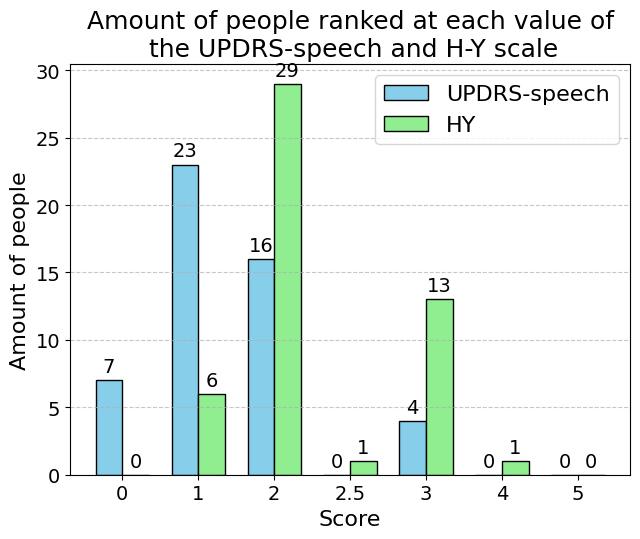

In [6]:
# Data
categories = ['0', '1', '2', '2.5', '3', '4', '5']
updrs_speech_counts = [7, 23, 16, 0, 4, 0, 0]
hy_counts = [0, 6, 29, 1, 13, 1, 0]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6.5,5.5))
rects1 = ax.bar(x - width/2, updrs_speech_counts, width, label='UPDRS-speech', color='skyblue', edgecolor='black')
rects2 = ax.bar(x + width/2, hy_counts, width, label='HY', color='lightgreen', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlabel('Score', fontsize=16)
ax.set_ylabel('Amount of people', fontsize=16)
ax.set_title('Amount of people ranked at each value of\n the UPDRS-speech and H-Y scale', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(fontsize=16)


autolabel(rects1, ax, size=14)
autolabel(rects2, ax, size=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()

plt.show()


In [20]:
# plot_histogram(metadata["AGE"], "Age", "Distribution of age among all people", bins=list(range(25, 95, 5)))
# plot_histogram(PD["AGE"], "Age", "Distribution of age among Parkinsons patients", color=PD_color, bins=list(range(25, 95, 5)))
# plot_histogram(HC["AGE"], "Age", "Distribution of age among healthy patients", color=HC_color, bins=list(range(25, 95, 5)))


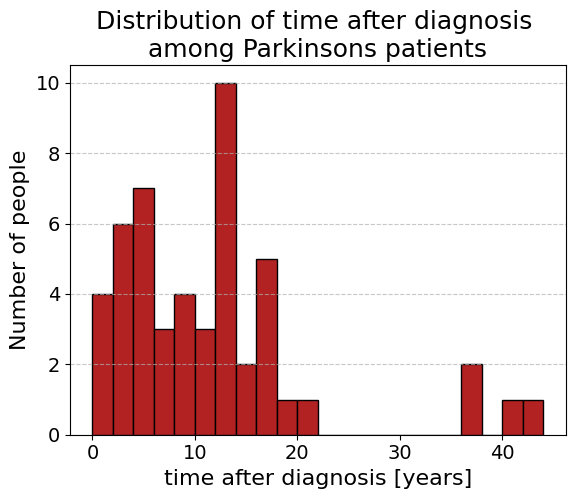

In [8]:
# PD info: 
# plot_histogram(PD["UPDRS"], "UPDRS", "Distribution of UPDRS among Parkinsons patients", color=PD_color, bins=list(range(0, 100, 5)))
# plot_histogram(PD["UPDRS-speech"], "UPDRS-speech", "Distribution of UPDRS-speech among Parkinsons patients", color=PD_color, bins=[0.0, 1.0, 2.0, 3.0, 4])
# plot_histogram(PD["H/Y"], "H/Y", "Distribution of H/Y among Parkinsons patients", color=PD_color, bins=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5])
plot_histogram(PD["time after diagnosis"], "time after diagnosis [years]", "Distribution of time after diagnosis \namong Parkinsons patients", color=PD_color, bins = list(range(0, 45, 2)))




In [9]:
def plot_histogram_together(data, labels, xlabel, title, colors, bins = False):
    if bins: 
        plt.hist(data, stacked=True, label=labels, edgecolor = "black", color = colors, bins=bins)
    else:
        plt.hist(data, stacked=True, label=labels, edgecolor = "black", color = colors)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Number of people', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()

    plt.show()

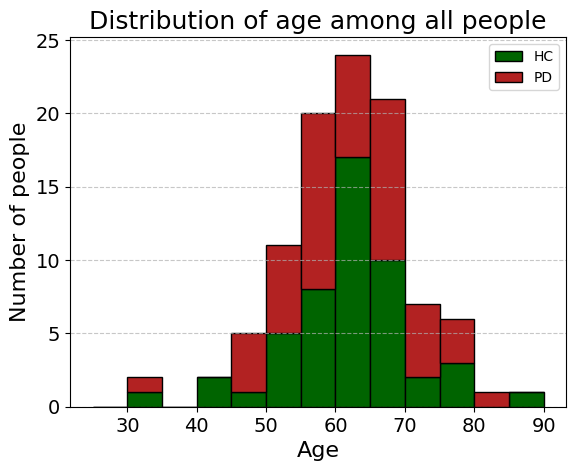

In [10]:
plot_histogram_together([HC["AGE"], PD["AGE"]], ["HC", "PD"], "Age", "Distribution of age among all people", [HC_color, PD_color], bins=list(range(25, 95, 5)))
# plot_histogram_together([HC_women["AGE"], PD_women["AGE"], HC_men["AGE"], PD_men["AGE"]], ["HC women", "PD women", "HC men", "PD men"], "Age", "Distribution of age among all people", ["SeaGreen", "IndianRed", "LightGreen", "Salmon"], bins=list(range(25, 95, 5)))

# Fold info 

In [11]:
fold_info_path = os.path.join(personal_path_to_balanced_folds,"kfold-groups-tsv.csv")
fold_info = pd.read_csv(fold_info_path)
display(fold_info)

,ID,Sex,Group,Fold
0,A0013,M,PD,0
1,A0037,M,PD,0
2,A0042,F,PD,0
3,A0045,F,PD,0
4,A0047,F,PD,0
...,...,...,...,...
95,AC0003,M,HC,9
96,AC0015,F,HC,9
97,AC0025,F,HC,9
98,AC0044,M,HC,9


In [12]:
# Information about each fold: 
num_folds = len(fold_info["Fold"].unique())

for fold_num in range(num_folds): # Iterate through folds 
    print(" ")
    fold_data = fold_info[fold_info['Fold'] == fold_num]
                    
    num_female = len(fold_data[fold_data['Sex'] == "F"])
    num_male = len(fold_data[fold_data['Sex'] == "M"])
    num_pd = len(fold_data[fold_data['Group'] == "PD"])
    num_hc = len(fold_data[fold_data['Group'] == "HC"])
    print(f"In fold number {fold_num} there are: ")
    # print(f"\t Females: {num_female}, Males: {num_male}, PD: {num_pd}, HC: {num_hc}")
    
    # Mixed group (is not the same in each fold, but interesting to know how many.)
    # print("\t In HC: ", len(fold_data[(fold_data['Sex'] == "F") & (fold_data['Group'] == "HC")]), " females and ", len(fold_data[(fold_data['Sex'] == "M") & (fold_data['Group'] == "HC")]), "males.")
    # print("\t In PD: ", len(fold_data[(fold_data['Sex'] == "F") & (fold_data['Group'] == "PD")]), " females and ", len(fold_data[(fold_data['Sex'] == "M") & (fold_data['Group'] == "PD")]), "males.")
    
    print("\t", *list(fold_data["ID"]))


 
In fold number 0 there are: 
	 A0013 A0037 A0042 A0045 A0047 AC0006 AC0024 AC0037 AC0043 AC0045
 
In fold number 1 there are: 
	 A0008 A0015 A0027 A0039 A0053 AC0010 AC0014 AC0016 AC0021 AC0049
 
In fold number 2 there are: 
	 A0003 A0020 A0046 A0054 A0058 AC0005 AC0012 AC0023 AC0039 AC0048
 
In fold number 3 there are: 
	 A0011 A0016 A0041 A0057 A0059 AC0013 AC0017 AC0018 AC0046 AC0052
 
In fold number 4 there are: 
	 A0005 A0009 A0010 A0029 A0038 AC0007 AC0030 AC0031 AC0033 AC0047
 
In fold number 5 there are: 
	 A0014 A0025 A0043 A0049 A0050 AC0004 AC0020 AC0022 AC0028 AC0034
 
In fold number 6 there are: 
	 A0007 A0021 A0034 A0035 A0056 AC0001 AC0026 AC0041 AC0050 AC0053
 
In fold number 7 there are: 
	 A0002 A0023 A0024 A0032 A0051 AC0008 AC0011 AC0035 AC0040 AC0054
 
In fold number 8 there are: 
	 A0001 A0006 A0017 A0026 A0031 AC0019 AC0027 AC0029 AC0042 AC0051
 
In fold number 9 there are: 
	 A0022 A0030 A0048 A0052 A0055 AC0003 AC0015 AC0025 AC0044 AC0057


# Metadata based on fold number: 
To analyse data in the different folds in a good way. 

In [13]:
all_metadata = add_columns_to_dataframe(metadata, fold_info, ["Group", "Fold"])
display(all_metadata)

,ID,UPDRS,UPDRS-speech,H/Y,SEX,AGE,time after diagnosis,Group,Fold
0,A0001,28.0,1.0,2.0,M,64,3.0,PD,8
1,A0002,19.0,0.0,1.0,F,72,2.5,PD,7
2,A0003,52.0,2.0,3.0,F,75,3.0,PD,2
3,A0005,32.0,1.0,2.0,M,65,12.0,PD,4
4,A0006,28.0,1.0,2.0,F,66,4.0,PD,8
...,...,...,...,...,...,...,...,...,...
95,AC0051,NaN,NaN,NaN,M,31,NaN,HC,8
96,AC0052,NaN,NaN,NaN,M,42,NaN,HC,3
97,AC0053,NaN,NaN,NaN,F,50,NaN,HC,6
98,AC0054,NaN,NaN,NaN,F,49,NaN,HC,7


In [14]:
# Analyse all folds --> For each fold write out average age, length of disease, etc. (Average of all metadata) 

fold_information = pd.DataFrame()

num_folds = len(fold_info["Fold"].unique())

for fold_num in range(num_folds): # Iterate through folds 
    fold_data = all_metadata[all_metadata['Fold'] == fold_num]    
    
    parkinsons = fold_data[fold_data['Group'] == "PD"]
    
    fold_information.at[fold_num, "avg AGE"] = np.average(fold_data['AGE'])
    fold_information.at[fold_num, "avg AGE HC"] = np.average(fold_data[fold_data['Group'] == "HC"]['AGE'])
    fold_information.at[fold_num, "avg AGE PD"] = np.average(parkinsons['AGE'])
    fold_information.at[fold_num, "avg UPDRS"] = np.average(parkinsons['UPDRS'])
    fold_information.at[fold_num, "avg UPDRS-speech"] = np.average(parkinsons['UPDRS-speech'])
    fold_information.at[fold_num, "avg H/Y"] = np.average(parkinsons['H/Y'])
    fold_information.at[fold_num, "avg time after diagnosis"] = np.average(parkinsons['time after diagnosis'])
    
    # fold_information.at[fold_num, "F in HC"] = len(fold_data[(fold_data['SEX'] == "F") & (fold_data['Group'] == "HC")])
    # fold_information.at[fold_num, "M in HC"] = len(fold_data[(fold_data['SEX'] == "M") & (fold_data['Group'] == "HC")])
    # fold_information.at[fold_num, "F in PD"] = len(fold_data[(fold_data['SEX'] == "F") & (fold_data['Group'] == "PD")])
    # fold_information.at[fold_num, "M in PD"] = len(fold_data[(fold_data['SEX'] == "M") & (fold_data['Group'] == "PD")])
    
    # fold_information.at[fold_num, "F"] = len(fold_data[fold_data['SEX'] == "F"])
    # fold_information.at[fold_num, "M"] = len(fold_data[fold_data['SEX'] == "M"])
    # fold_information.at[fold_num, "PD"] = len(fold_data[fold_data['Group'] == "PD"])
    # fold_information.at[fold_num, "HC"] = len(fold_data[fold_data['Group'] == "HC"])

display(fold_information)

print(np.array(fold_information["avg AGE HC"]))
print(np.array(fold_information["avg AGE PD"]))

,avg AGE,avg AGE HC,avg AGE PD,avg UPDRS,avg UPDRS-speech,avg H/Y,avg time after diagnosis
0,65.8,67.4,64.2,42.2,1.0,2.3,9.60
1,62.9,62.6,63.2,34.0,1.4,2.2,12.80
2,60.5,61.4,59.6,34.6,1.2,2.2,6.80
3,59.1,59.8,58.4,39.2,2.0,2.8,15.40
4,56.4,54.8,58.0,27.8,1.0,2.4,22.80
5,63.0,70.0,56.0,46.2,1.6,2.2,8.20
6,57.7,59.0,56.4,31.8,1.2,2.2,10.80
7,61.8,58.6,65.0,42.6,1.0,1.6,5.90
8,61.6,57.0,66.2,33.4,1.2,1.8,7.40
9,61.2,59.2,63.2,44.8,1.8,2.2,12.68


[67.4 62.6 61.4 59.8 54.8 70.  59.  58.6 57.  59.2]
[64.2 63.2 59.6 58.4 58.  56.  56.4 65.  66.2 63.2]


In [15]:
# Analyse all folds --> For each fold write out list of age, length of disease, etc. (List of all metadata) 

fold_information = pd.DataFrame()

num_folds = len(fold_info["Fold"].unique())

for fold_num in range(num_folds): # Iterate through folds 
    fold_data = all_metadata[all_metadata['Fold'] == fold_num]    
    
    parkinsons = fold_data[fold_data['Group'] == "PD"]
    
    fold_information.at[fold_num, "ID"] = ', '.join(map(str, parkinsons['ID']))
    # fold_information.at[fold_num, "AGE"] = ', '.join(map(str, fold_data['AGE']))

    fold_information.at[fold_num, "AGE PD"] = ', '.join(map(str, parkinsons['AGE']))
    fold_information.at[fold_num, "UPDRS"] = ', '.join(map(str, parkinsons['UPDRS']))
    fold_information.at[fold_num, "UPDRS-speech"] = ', '.join(map(str, parkinsons['UPDRS-speech']))
    fold_information.at[fold_num, "H/Y"] = ', '.join(map(str, parkinsons['H/Y']))
    fold_information.at[fold_num, "time after diagnosis"] = ', '.join(map(str, parkinsons['time after diagnosis']))


display(fold_information)
    
    

,ID,AGE PD,UPDRS,UPDRS-speech,H/Y,time after diagnosis
0,"A0013, A0037, A0042, A0045, A0047","59, 74, 65, 59, 64","6.0, 40.0, 54.0, 71.0, 40.0","0.0, 2.0, 1.0, 1.0, 1.0","1.0, 2.5, 3.0, 3.0, 2.0","8.0, 12.0, 8.0, 17.0, 3.0"
1,"A0008, A0015, A0027, A0039, A0053","60, 66, 75, 68, 47","29.0, 28.0, 13.0, 67.0, 33.0","1.0, 1.0, 0.0, 3.0, 2.0","2.0, 2.0, 1.0, 4.0, 2.0","37.0, 4.0, 1.0, 20.0, 2.0"
2,"A0003, A0020, A0046, A0054, A0058","75, 55, 69, 54, 45","52.0, 30.0, 40.0, 30.0, 21.0","2.0, 1.0, 2.0, 0.0, 1.0","3.0, 2.0, 3.0, 2.0, 1.0","3.0, 12.0, 5.0, 7.0, 7.0"
3,"A0011, A0016, A0041, A0057, A0059","55, 60, 54, 68, 55","43.0, 44.0, 15.0, 65.0, 29.0","2.0, 1.0, 3.0, 2.0, 2.0","3.0, 3.0, 3.0, 3.0, 2.0","12.0, 10.0, 4.0, 8.0, 43.0"
4,"A0005, A0009, A0010, A0029, A0038","65, 57, 51, 69, 48","32.0, 41.0, 38.0, 19.0, 9.0","1.0, 1.0, 2.0, 0.0, 1.0","2.0, 3.0, 3.0, 2.0, 2.0","12.0, 37.0, 41.0, 12.0, 12.0"
5,"A0014, A0025, A0043, A0049, A0050","57, 50, 33, 67, 73","61.0, 53.0, 51.0, 28.0, 38.0","2.0, 2.0, 2.0, 1.0, 1.0","3.0, 2.0, 2.0, 2.0, 2.0","17.0, 7.0, 9.0, 4.0, 4.0"
6,"A0007, A0021, A0034, A0035, A0056","55, 62, 50, 51, 64","30.0, 42.0, 19.0, 23.0, 45.0","1.0, 1.0, 1.0, 2.0, 1.0","2.0, 3.0, 2.0, 2.0, 2.0","12.0, 12.0, 17.0, 10.0, 3.0"
7,"A0002, A0023, A0024, A0032, A0051","72, 68, 71, 56, 58","19.0, 14.0, 93.0, 30.0, 57.0","0.0, 0.0, 2.0, 1.0, 2.0","1.0, 1.0, 2.0, 2.0, 2.0","2.5, 1.0, 11.0, 14.0, 1.0"
8,"A0001, A0006, A0017, A0026, A0031","64, 66, 81, 61, 59","28.0, 28.0, 50.0, 21.0, 40.0","1.0, 1.0, 1.0, 1.0, 2.0","2.0, 2.0, 2.0, 1.0, 2.0","3.0, 4.0, 12.0, 4.0, 14.0"
9,"A0022, A0030, A0048, A0052, A0055","57, 75, 49, 70, 65","20.0, 75.0, 53.0, 23.0, 53.0","0.0, 3.0, 3.0, 1.0, 2.0","2.0, 3.0, 2.0, 2.0, 2.0","0.4, 16.0, 16.0, 12.0, 19.0"


# Analysing folds more detailed: 

In [16]:

def analyse_metadata(data):
    # Average age 
    print(f"Average age is {np.average(data['AGE'])}")

    HC = data[data['ID'].str.contains("C")]
    PD = data[~data['ID'].str.contains("C")]

    print(f"We have {len(HC)} healthy and {len(PD)} Parkinsons Patients. ")

    # Seperate data for men and women 
    women = data[data['SEX'] == 'F']
    men = data[data['SEX'] == 'M']
    print(f"We have {len(women)} women and {len(men)} men. ")
    print(" ")
    
    HC_women = HC[HC['SEX'] == 'F']
    HC_men = HC[HC['SEX'] == 'M']
    PD_women = PD[PD['SEX'] == 'F']
    PD_men = PD[PD['SEX'] == 'M']

    print(f"Average age for women is {np.average(women['AGE'])}")
    print(f"Average age for men is {np.average(men['AGE'])}")

    print(f"Average age for HC is {np.average(HC['AGE'])}")
    print(f"Average age for PD is {np.average(PD['AGE'])}")


    plot_histogram(data["AGE"], "Age", "Distribution of age among all people", ylim=(0,10))
    plot_histogram(PD["AGE"], "Age", "Distribution of age among Parkinsons patients", ylim=(0,5), color=PD_color)
    plot_histogram(HC["AGE"], "Age", "Distribution of age among healthy patients", ylim=(0,5), color=HC_color)


    # PD info: 
    plot_histogram(PD["UPDRS"], "UPDRS", "Distribution of UPDRS among Parkinsons patients", ylim=(0,5), color=PD_color)
    plot_histogram(PD["UPDRS-speech"], "UPDRS-speech", "Distribution of UPDRS-speech among Parkinsons patients", ylim=(0,5), color=PD_color)
    plot_histogram(PD["H/Y"], "H/Y", "Distribution of H/Y among Parkinsons patients", ylim=(0,5), color=PD_color)
    plot_histogram(PD["time after diagnosis"], "time after diagnosis [years]", "Distribution of time after diagnosis among Parkinsons patients", ylim=(0,5), color=PD_color)

    plot_histogram_together([HC["AGE"], PD["AGE"]], ["HC", "PD"], "Age", "Distribution of age among all people", [HC_color, PD_color])
    plot_histogram_together([HC_women["AGE"], PD_women["AGE"], HC_men["AGE"], PD_men["AGE"]], ["HC women", "PD women", "HC men", "PD men"], "Age", "Distribution of age among all people", ["SeaGreen", "IndianRed", "LightGreen", "Salmon"])



In [17]:
write_to_excel([all_metadata[["ID", "SEX", "AGE", "Fold"]]], personal_path_to_code + "/Automated_results.xlsx") # results_to_exell

Data written to excell file /home/malinre/master-thesis/Master-thesis-about-Parkinsons-Detection/Automated_results.xlsx, in sheet 05-07-2024_01-34-40.
---------------------------------------------------------------


In [18]:
for i in range(0,10):
    fold_data = all_metadata[all_metadata['Fold'] == i]
    # display(fold_data)
    display(fold_data[["ID", "SEX", "Fold", "AGE"]])
    # analyse_metadata(fold_data)

,ID,SEX,Fold,AGE
10,A0013,M,0,59
29,A0037,M,0,74
33,A0042,F,0,65
35,A0045,F,0,59
37,A0047,F,0,64
54,AC0006,F,0,65
71,AC0024,F,0,61
82,AC0037,M,0,76
87,AC0043,M,0,68
89,AC0045,M,0,67


,ID,SEX,Fold,AGE
6,A0008,F,1,60
12,A0015,F,1,66
22,A0027,M,1,75
31,A0039,M,1,68
43,A0053,M,1,47
57,AC0010,F,1,63
61,AC0014,F,1,62
63,AC0016,F,1,65
68,AC0021,M,1,55
93,AC0049,M,1,68


,ID,SEX,Fold,AGE
2,A0003,F,2,75
15,A0020,F,2,55
36,A0046,M,2,69
44,A0054,F,2,54
48,A0058,M,2,45
53,AC0005,M,2,67
59,AC0012,F,2,55
70,AC0023,F,2,62
83,AC0039,M,2,61
92,AC0048,M,2,62


,ID,SEX,Fold,AGE
9,A0011,F,3,55
13,A0016,M,3,60
32,A0041,M,3,54
47,A0057,M,3,68
49,A0059,F,3,55
60,AC0013,F,3,68
64,AC0017,F,3,63
65,AC0018,F,3,55
90,AC0046,M,3,71
96,AC0052,M,3,42


,ID,SEX,Fold,AGE
3,A0005,M,4,65
7,A0009,F,4,57
8,A0010,F,4,51
23,A0029,F,4,69
30,A0038,M,4,48
55,AC0007,F,4,60
77,AC0030,F,4,57
78,AC0031,M,4,42
79,AC0033,M,4,65
91,AC0047,M,4,50


,ID,SEX,Fold,AGE
11,A0014,F,5,57
20,A0025,M,5,50
34,A0043,M,5,33
39,A0049,M,5,67
40,A0050,F,5,73
52,AC0004,F,5,75
67,AC0020,F,5,58
69,AC0022,M,5,55
75,AC0028,F,5,76
80,AC0034,M,5,86


,ID,SEX,Fold,AGE
5,A0007,F,6,55
16,A0021,F,6,62
27,A0034,M,6,50
28,A0035,F,6,51
46,A0056,M,6,64
50,AC0001,F,6,63
73,AC0026,M,6,56
85,AC0041,M,6,62
94,AC0050,M,6,64
97,AC0053,F,6,50


,ID,SEX,Fold,AGE
1,A0002,F,7,72
18,A0023,M,7,68
19,A0024,M,7,71
26,A0032,M,7,56
41,A0051,F,7,58
56,AC0008,F,7,57
58,AC0011,F,7,73
81,AC0035,M,7,63
84,AC0040,M,7,51
98,AC0054,F,7,49


,ID,SEX,Fold,AGE
0,A0001,M,8,64
4,A0006,F,8,66
14,A0017,M,8,81
21,A0026,F,8,61
25,A0031,F,8,59
66,AC0019,F,8,63
74,AC0027,M,8,63
76,AC0029,F,8,61
86,AC0042,M,8,67
95,AC0051,M,8,31


,ID,SEX,Fold,AGE
17,A0022,M,9,57
24,A0030,M,9,75
38,A0048,F,9,49
42,A0052,F,9,70
45,A0055,M,9,65
51,AC0003,M,9,67
62,AC0015,F,9,61
72,AC0025,F,9,64
88,AC0044,M,9,54
99,AC0057,F,9,50
